In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [90]:
df = pd.read_csv('final_asset_classes.csv', index_col=0, parse_dates=True)

In [91]:
df.tail()

,MSCI,FTSEREEL,FTSECORP,PE,FTSEGOV,FTWBIGUSDT,FTSECORPALT
Date,,,,,,,
2024-10-31,3.403949,1.760852,1.571972,4.821619,1.560736,1.690935,1.571325
2024-11-01,3.431445,1.767331,1.570132,4.814647,1.558476,1.693507,1.575503
2024-11-04,3.414243,1.755107,1.572360,4.760867,1.561720,1.695456,1.578743
2024-11-05,3.431897,1.751329,1.569726,4.840052,1.559328,1.687572,1.568884
2024-11-06,3.552570,1.719811,1.571671,5.091889,1.558537,1.702074,1.576408


In [92]:
# drop FTSECORP and FTSECORPALT
df.drop(columns=['FTSECORP', 'FTSECORPALT'], inplace=True)

In [93]:
fig = go.Figure()

for column in df.columns:
    fig.add_trace(go.Scatter(
        x=df.index, y=df[column],
        mode='lines',
        name=column,
        line=dict(width=0.75)
    ))

fig.update_layout(
    title="Historical Performance",
    xaxis_title="Date",
    yaxis_title="Normalized Price",
    legend_title="Assets",
    # template="plotly_dark"
)

fig.show()

In [94]:
df.describe()

,MSCI,FTSEREEL,PE,FTSEGOV,FTWBIGUSDT
count,4978.000000,4933.000000,4951.000000,4947.000000,4864.000000
mean,1.607546,1.411812,1.713959,1.411081,1.434617
std,0.705900,0.460892,1.048453,0.266915,0.290897
min,0.554699,0.392264,0.243334,0.965870,0.913357
25%,1.027655,1.012815,0.951597,1.165409,1.192789
50%,1.464879,1.487423,1.397942,1.476972,1.550671
75%,2.010514,1.750064,2.069297,1.620381,1.666840
max,3.552570,2.416112,5.091889,1.842570,1.881555


In [95]:
monthly_stats = df.resample('ME').agg(['mean', 'median', 'min', 'max', 'std'])

yearly_stats = df.resample('YE').agg(['mean', 'median', 'min', 'max', 'std'])

In [96]:
monthly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2005-10-31  0.996602  0.995834  0.983613  1.011656  0.006830  0.976514   
2005-11-30  1.051403  1.054217  1.010554  1.077336  0.017349  1.016044   
2005-12-31  1.079926  1.079347  1.069268  1.090455  0.006266  1.035799   
2006-01-31  1.087779  1.087936  1.061617  1.103723  0.012135  1.097440   
2006-02-28  1.107042  1.107418  1.094020  1.131043  0.010315  1.151335   

                                                    ...   FTSEGOV            \
              median       min       max       std  ...      mean    median   
Date                                                ...                       
2005-10-31  0.973418  0.962602  1.003231  0.013304  ...  0.993752  0.993495   
2005-11-30  1.019570  0.982750  1.030494  0.013205  ...  0.985700  0.985415   
2005-12-31  1.040719  1.019482  1.053061  0.011694  ...  0.993753  0.993180   
2006-01-31  1.070713  1.056545  1.587238  0.110481  ...  0.997630  0.999549   
2006-02-28  1.153059  1.115025  1.198331  0.026485  ...  0.991657  0.991542   

                                         FTWBIGUSDT                      \
                 min       max       std       mean    median       min   
Date                                                                      
2005-10-31  0.987777  1.000000  0.003677   0.997159  0.997012  0.988982   
2005-11-30  0.981336  0.991110  0.002761   1.000881  1.001308  0.987719   
2005-12-31  0.989198  0.999178  0.002564   1.004981  1.005258  0.995198   
2006-01-31  0.989409  1.002475  0.004582   1.001194  1.002492  0.993703   
2006-02-28  0.988315  0.995472  0.001941   1.003656  1.004725  0.993795   

                                
                 max       std  
Date                            
2005-10-31  1.006025  0.004553  
2005-11-30  1.008742  0.005462  
2005-12-31  1.014210  0.004979  
2006-01-31  1.009868  0.004906  
2006-02-28  1.011404  0.004641  

[5 rows x 25 columns]

In [97]:
yearly_stats.head()

MSCI                                          FTSEREEL  \
                mean    median       min       max       std      mean   
Date                                                                     
2005-12-31  1.047248  1.060264  0.983613  1.090455  0.035116  1.012746   
2006-12-31  1.093559  1.101661  1.007351  1.152148  0.036213  1.265923   
2007-12-31  1.164744  1.167423  1.054753  1.228576  0.036341  1.393871   
2008-12-31  0.888819  0.924052  0.629092  1.106326  0.117829  0.888242   
2009-12-31  0.716762  0.709632  0.554699  0.833691  0.065640  0.614299   

                                                    ...   FTSEGOV            \
              median       min       max       std  ...      mean    median   
Date                                                ...                       
2005-12-31  1.021398  0.962602  1.053061  0.026720  ...  0.990750  0.991284   
2006-12-31  1.241755  1.056545  1.587238  0.125046  ...  0.986875  0.989374   
2007-12-31  1.404492  1.021649  1.670320  0.187123  ...  0.997259  0.995655   
2008-12-31  0.912607  0.513878  1.121622  0.177032  ...  1.041313  1.035843   
2009-12-31  0.581668  0.392264  0.777878  0.103237  ...  1.128934  1.126934   

                                         FTWBIGUSDT                      \
                 min       max       std       mean    median       min   
Date                                                                      
2005-12-31  0.981336  1.000000  0.004894   1.001339  1.001557  0.987719   
2006-12-31  0.965870  1.009157  0.012246   0.978607  0.976744  0.949562   
2007-12-31  0.971841  1.022197  0.012049   0.959026  0.956495  0.932789   
2008-12-31  1.001109  1.109300  0.026066   0.983953  0.965722  0.913357   
2009-12-31  1.077595  1.166147  0.022637   1.093885  1.091690  1.055072   

                                
                 max       std  
Date                            
2005-12-31  1.014210  0.005873  
2006-12-31  1.011404  0.015080  
2007-12-31  0.984760  0.011234  
2008-12-31  1.119899  0.057591  
2009-12-31  1.144956  0.017699  

[5 rows x 25 columns]

## Now Plotting Dsitrbutions For Daily Returns

Each asset done separately

In [98]:
daily_returns = df.pct_change(fill_method=None).dropna()

In [99]:
daily_returns.describe()

,MSCI,FTSEREEL,PE,FTSEGOV,FTWBIGUSDT
count,4666.000000,4666.000000,4666.000000,4666.000000,4666.000000
mean,0.000296,0.000149,0.000383,0.000106,0.000134
std,0.010044,0.013327,0.013358,0.002939,0.005450
min,-0.101210,-0.114930,-0.128207,-0.016023,-0.119517
25%,-0.004169,-0.006080,-0.004988,-0.001417,-0.002415
50%,0.000723,0.000347,0.000950,0.000169,0.000012
75%,0.005262,0.006868,0.006703,0.001604,0.002585
max,0.081038,0.095947,0.127987,0.020704,0.138173


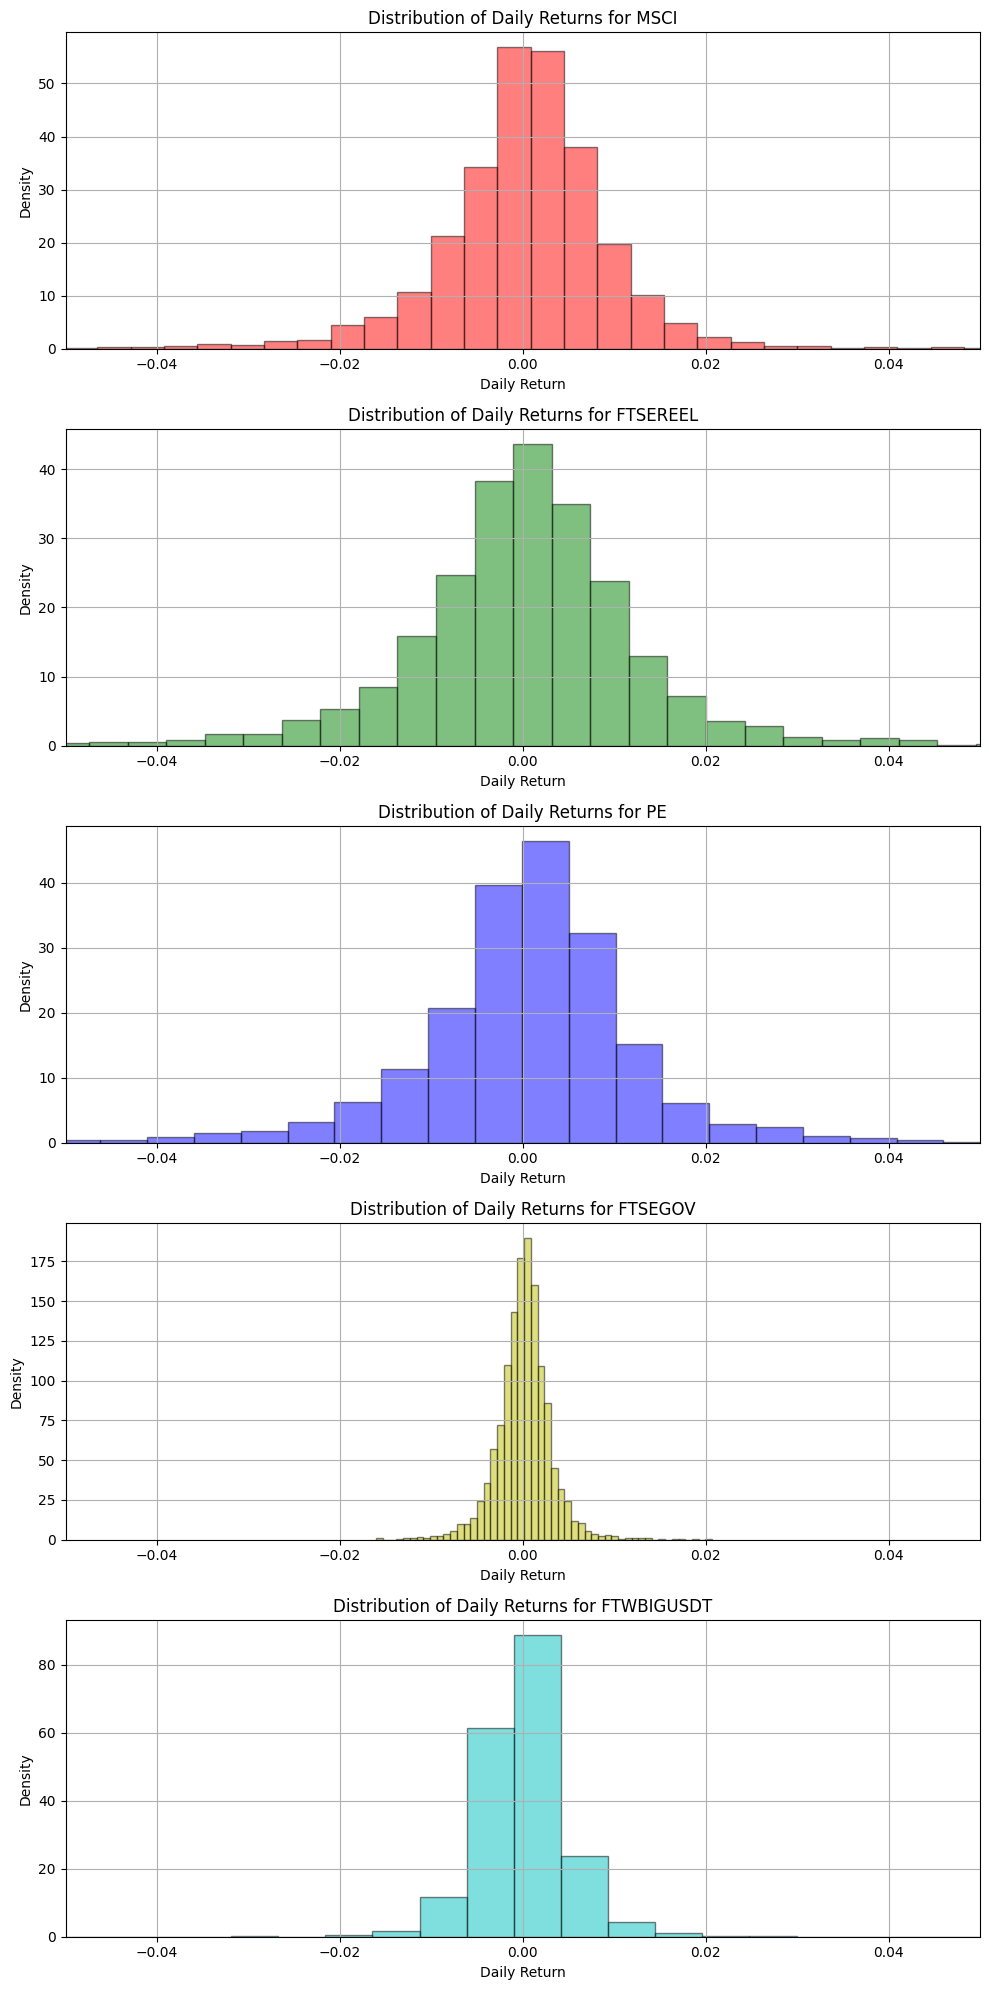

In [100]:

x_min = daily_returns.min().min()  # Overall minimum daily return
x_max = daily_returns.max().max()  # Overall maximum daily return

x_min, x_max = -0.05, 0.05  # Adjust as needed

num_columns = len(daily_returns.columns)


fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 4 * num_columns))


colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']


for i, column in enumerate(daily_returns.columns):
    axes[i].hist(
        daily_returns[column].dropna(),
        bins=50,
        color=colors[i % len(colors)],
        alpha=0.5,
        density=True,
        edgecolor='black'
    )
    axes[i].set_title(f'Distribution of Daily Returns for {column}')
    axes[i].set_xlabel('Daily Return')
    axes[i].set_ylabel('Density')
    axes[i].grid(True)
    

    axes[i].set_xlim(x_min, x_max)

plt.tight_layout()
plt.show()

In [101]:
num_bins = 50
colors = [
    '#636EFA',  # Soft blue
    '#EF553B',  # Soft red
    '#00CC96',  # Soft green
    '#AB63FA',  # Soft purple
    '#FFA15A',  # Soft orange
    '#19D3F3',  # Light blue
    '#FF6692',  # Light pink
    '#B6E880',  # Soft lime green
    '#FF97FF',  # Light magenta
    '#FECB52'   # Soft yellow
]

fig = make_subplots(rows=num_columns, cols=1, subplot_titles=[
                    f'Distribution of Daily Returns for {col}' for col in daily_returns.columns])

# colors = ['red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'orange', 'purple', 'pink', 'brown']
colors = [
    '#636EFA',  # blue
    '#EF553B',  # red
    '#00CC96',  # green
    '#AB63FA',  # purple
    '#FFA15A',  # orange
    '#19D3F3',  # Light blue
    '#FF6692',  # Light pink
    '#B6E880',  # lime green
    '#FF97FF',  # magenta
    '#FECB52'   # yellow
]

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(
        go.Histogram(
            x=daily_returns[column].dropna(),
            nbinsx=num_bins,
            marker_color=colors[i % len(colors)],
            opacity=0.5,
            histnorm='probability density'
        ),
        row=i+1, col=1
    )
    fig.update_xaxes(range=[x_min, x_max], row=i+1, col=1)
    fig.update_yaxes(title_text="Density", row=i+1, col=1)

fig.update_layout(
    height=400 * num_columns,
    width=800,
    showlegend=False,
    title_text="Distribution of Daily Returns for Each Asset",
)

fig.show()

In [102]:
fig = go.Figure()

for i, column in enumerate(daily_returns.columns):
    fig.add_trace(go.Histogram(
        x=daily_returns[column].dropna(),
        xbins=dict(
            start=x_min,
            end=x_max,
            size=(x_max - x_min) / num_bins  # Fixed bin size for consistency
        ),
        marker_color=colors[i % len(colors)],
        opacity=0.5,
        name=column,
        histnorm='probability density'
    ))

# Update layout for better presentation
fig.update_layout(
    title="Distribution of Daily Returns for All Assets",
    xaxis_title="Daily Return",
    yaxis_title="Density",
    barmode='overlay',  # Overlay all histograms
    xaxis=dict(range=[x_min, x_max]),
    legend_title="Assets"
)

fig.show()

Done in one graph

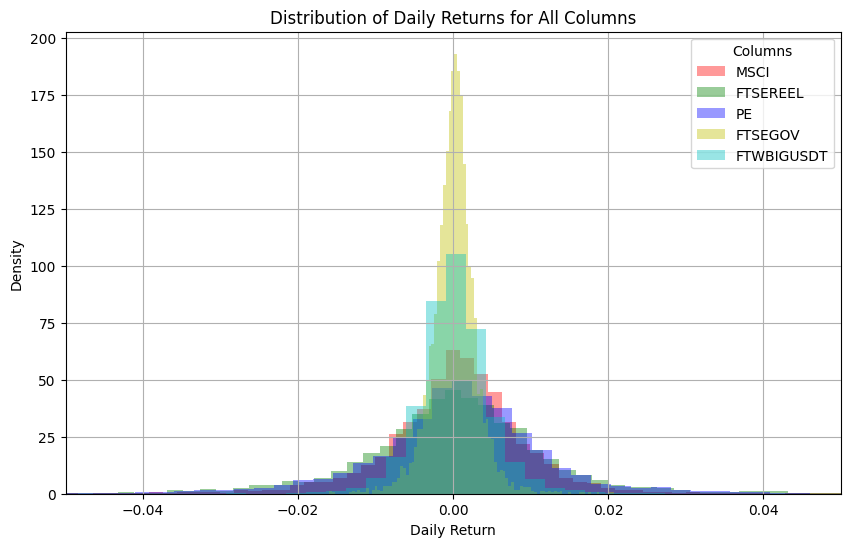

In [103]:
plt.figure(figsize=(10, 6))

# Define colors for each column (extend if necessary)
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'purple', 'pink', 'brown']

# Plot histogram for daily returns of each column on the same plot
for i, column in enumerate(daily_returns.columns):
    plt.hist(
        daily_returns[column].dropna(), 
        bins=100, 
        alpha=0.4, 
        color=colors[i % len(colors)],  # Loop through colors if there are more columns than colors
        label=column, 
        density=True  # Show density instead of count
    )

# Set x-axis limits to make the plot narrower
plt.xlim(-0.05, 0.05)  # Adjust this range to control the "narrowness"

# Add title and labels
plt.title('Distribution of Daily Returns for All Columns')
plt.xlabel('Daily Return')
plt.ylabel('Density')

# Add grid and legend
plt.grid(True)
plt.legend(title="Columns", loc='upper right')

# Show the plot
plt.show()

## Correlation Matrix

In [104]:
correlation_matrix = daily_returns.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
correlation_matrix_masked = correlation_matrix.where(~mask)

fig = go.Figure(data=go.Heatmap(
    z=correlation_matrix_masked.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    colorbar_title="Correlation",
    zmin=-1, zmax=1,
    text=np.round(correlation_matrix_masked.values, 2),
    hovertemplate="%{text}",
))
fig.update_layout(
    title="Lower Triangular Correlation Matrix of Daily Returns",
    xaxis=dict(tickangle=45),
    yaxis=dict(autorange="reversed"),
    #template="plotly_dark"
)

fig.show()

### Descriptive stats


In [105]:
summary_stats = pd.DataFrame({
    "Min": daily_returns.min(),
    "Max": daily_returns.max(),
    "Mean": daily_returns.mean(),
    "S.D.": daily_returns.std(),
    "Skewness": daily_returns.skew(),
    "Kurtosis": daily_returns.kurtosis()
})

# Round the results for easier reading
summary_stats = summary_stats.round(4)

# Display the results
summary_stats

,Min,Max,Mean,S.D.,Skewness,Kurtosis
MSCI,-0.1012,0.0810,0.0003,0.0100,-0.6146,10.8150
FTSEREEL,-0.1149,0.0959,0.0001,0.0133,-0.2787,6.0237
PE,-0.1282,0.1280,0.0004,0.0134,-0.5390,10.3101
FTSEGOV,-0.0160,0.0207,0.0001,0.0029,0.1620,4.4763
FTWBIGUSDT,-0.1195,0.1382,0.0001,0.0054,1.2980,138.9014
